Using TensorFlow backend.


data_storage/Market-1501-v15.09.15 found :)
could not find model.. downloading it
fp: /tmp/reid.h5


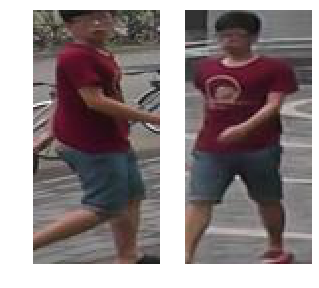

In [1]:
%matplotlib inline
from pak.datasets.Market1501 import Market1501
import matplotlib.pyplot as plt
from keras.models import load_model
import sys
sys.path.insert(0, '../')
from reid import reid

root = 'data_storage'
m1501 = Market1501(root)
X, Y = m1501.get_train()

model = reid.ReId()

im1 = X[0]
im2 = X[2]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(121); ax.axis('off')
ax.imshow(im1)
ax = fig.add_subplot(122); ax.axis('off')
ax.imshow(im2)
plt.show()

In [2]:
model.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 221, 221, 3)  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 221, 221, 3)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 2048)         20861480    input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 4096)         0           sequential_1[1][0]               
          

score: [0.02005175]


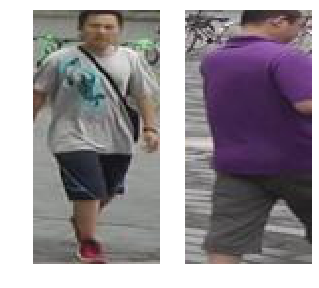

In [3]:
im1 = X[50]
im2 = X[500]

score = model.predict(im1, im2)

print('score:', score)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(121); ax.axis('off')
ax.imshow(im1)
ax = fig.add_subplot(122); ax.axis('off')
ax.imshow(im2)
plt.show()

score: [0.11398802 0.38131008 0.92963356 0.45755887 0.8609452  0.88340247]


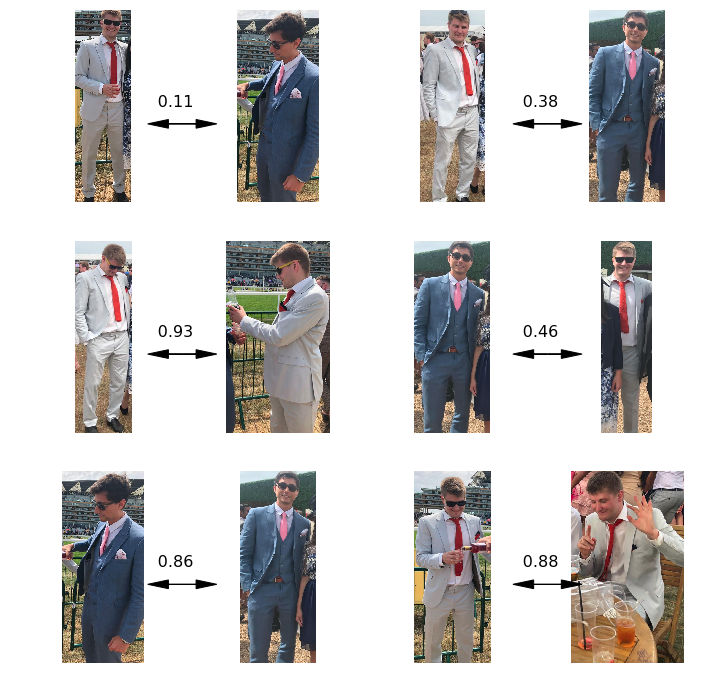

In [4]:
from math import ceil
import cv2
from os.path import isfile, join

A = ['im01', 'im02', 'im03', 'im09', 'im10', 'im04']
B = ['im10', 'im09', 'im07', 'im05', 'im09', 'im08']

A = [
    cv2.cvtColor(cv2.imread(join('img', a) + '.png'), 
                 cv2.COLOR_BGR2RGB) for a in A
]
B = [
    cv2.cvtColor(cv2.imread(join('img', b) + '.png'), 
                 cv2.COLOR_BGR2RGB) for b in B
]
assert len(A) == len(B)
n = len(A)

score = model.predict(A, B)

print('score:', score)



fig = plt.figure(figsize=(12, 12))

for i, (a, b, s) in enumerate(zip(A, B, score)):
    
    ax = fig.add_subplot(int(ceil(n/2)), 4, i*2+1)
    ax.axis('off')
    ax.imshow(a)
    ax = fig.add_subplot(int(ceil(n/2)), 4, i*2+2)
    ax.axis('off')
    ax.imshow(b)
    
    txt = "{:10.2f}".format(s)
    ax = fig.add_subplot(int(ceil(n/2)), 2, i+1)
    ax.axis('off')
    ax.text(0.3, 0.5, txt, fontsize=16)
    ax.plot([0, 1], [0, 1], alpha=0.0)
    ax.arrow(x=0.5, y=0.4, dx=-0.05, dy=0, head_width=0.05, color='black')
    ax.arrow(x=0.5, y=0.4, dx=0.05, dy=0, head_width=0.05, color='black')


plt.show()